#  Lead Score inference by Animesh and Ajitkumar DC33

## Problem Statement
An education company named __X Education__ sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. <br>

__When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.__<br>

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. __The typical lead conversion rate at X education is around 30%.__
 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as __‘Hot Leads’__. <br>



### Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

Another thing that you also need to check out for are the levels present in the categorical variables.<br>

__Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.__

 

### Goal


1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [ ]:
#Importing Library required for analysis
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import precision_recall_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
#Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Increasing the columns views limit
pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
#Reading file
leads = pd.read_csv(r'Leads.csv')

In [ ]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0         0.00   
1  Organic Search           No          No          0         5.00   
2  Direct Traffic           No          No          1         2.00   
3  Direct Traffic           No          No          0         1.00   
4          Google           No          No          1         2.00   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                  0.00  Page Visited on Website   
1                          674                  2.50             Email Opened   
2                         1532                  2.00             Email Opened   
3                          305                  1.00              Unreachable   
4                         1428                  1.00        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [ ]:
leads.describe()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
count      9240.00    9240.00      9103.00                      9240.00   
mean     617188.44       0.39         3.45                       487.70   
std       23406.00       0.49         4.85                       548.02   
min      579533.00       0.00         0.00                         0.00   
25%      596484.50       0.00         1.00                        12.00   
50%      615479.00       0.00         3.00                       248.00   
75%      637387.25       1.00         5.00                       936.00   
max      660737.00       1.00       251.00                      2272.00   

       Page Views Per Visit  Asymmetrique Activity Score  \
count               9103.00                      5022.00   
mean                   2.36                        14.31   
std                    2.16                         1.39   
min                    0.00                         7.00   
25%                    1.00                        14.00   
50%                    2.00                        14.00   
75%                    3.00                        15.00   
max                   55.00                        18.00   

       Asymmetrique Profile Score  
count                     5022.00  
mean                        16.34  
std                          1.81  
min                         11.00  
25%                         15.00  
50%                         16.00  
75%                         18.00  
max                         20.00

In [ ]:
#check the shape of the dataset
leads.shape

(9240, 37)

In [ ]:
Total_rows = len(leads.index)
print(Total_rows)

9240


In [ ]:
#Check whether there are any duplicates
leads.duplicated().sum()

0

***There are no duplicate values in the database***

In [ ]:
#Check the null values of all the columns and their data types
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

***Here we can notice that there are categorical variables for which we need to create dummy variables and treat the null values accordingly.***

In [ ]:
#Check the number of missing values in each column
leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

***Here we can notice high number of columns which have null values which is around 9000 rows in the dataframe. So we will drop those columns which have more than 3000 null values.***

## Data Cleaning

In [ ]:
#Drop all the columns in which greater than 3000 missing values are present
for col in leads.columns:
    if leads[col].isnull().sum() > 3000:
        leads.drop(col, 1, inplace=True)

In [ ]:
#Recheck the Null vaues in the database
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [ ]:
#Country & City have no role in our analysis hence we will be dropping them
leads.drop(['City','Country'], axis = 1, inplace = True)

In [ ]:
#Check the percentage of missing values in each column
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Specialization                                  15.56
How did you hear about X Education              23.89
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

***Here we are checking the percentage of null values.***

In [ ]:
#Get the value counts of all the columns
for column in leads:
    print(leads[column].astype('category').value_counts())
    print('='*60)

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

***Here we can notice that there are 3 attributes with select values "How did you hear about X Education", "Specilaization" & "Lead Profile".***

***We notice that "Lead Profile" & "How did you hear about X Education" column have "select" values > 50% of the total rows. So lets drop these attirbutes.*** 

***We will deal with "Specialization" later.***

In [ ]:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

***We also observed in above that there are many attributes which do not have vaiance values (ie. they have most of the values as unique, yes or no with one to 4 differnt values. Also 'What matters most to you in choosing a course' have 'Better Career Prospects' as unique values with 4 to 5 students otping for other available options. As there is no variance these attributes will not be useful for us in analysis hence lets drop them.***

In [ ]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque','What matters most to you in choosing a course'], axis = 1, inplace = True)

***Null values what we have seen above, 'What is your current occupation' attribute have little less than 2.7K null values which is around 30% of the total rows.*** 

***So deleting the column or retaining them will not be good for analysis. Hence we will delete these rows.***

In [ ]:
leads = leads[~pd.isnull(leads['What is your current occupation'])]

***Recheck the null values in the attributes.***

In [ ]:
leads.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

***As you can notice the null values are very less now and to get better analysis from the data, we will delete the rows with null values.***

In [ ]:
leads.dropna(axis = 0, how ='any', inplace= True)
leads.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

***Here we can notice the datframe doesn't have any null value which is good for analysis.*** 

***So in the next step lets check how much data is available for us for analysis.***

In [ ]:
print(len(leads.index))
print(len(leads.index)/Total_rows)

6373
0.6897186147186147


***We have around 68.9% of rows after handling the null values. Which we considered to be good number for analysis.***

***So now lets look at the database again after cleaning to see if the database is clean or need any further cleaning.***

In [ ]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email  Converted  TotalVisits  \
0      Olark Chat           No          0         0.00   
1  Organic Search           No          0         5.00   
2  Direct Traffic           No          1         2.00   
3  Direct Traffic           No          0         1.00   
4          Google           No          1         2.00   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                  0.00  Page Visited on Website   
1                          674                  2.50             Email Opened   
2                         1532                  2.00             Email Opened   
3                          305                  1.00              Unreachable   
4                         1428                  1.00        Converted to Lead   

            Specialization What is your current occupation  \
0                   Select                      Unemployed   
1                   Select                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Select                      Unemployed   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

***Above database looks normilized, considering only 20% of 'Select' value in 'Specialization' attribute.***

***Now the only thing what we see is 'Prospect ID' & 'Lead Number' is unique identifier of sutdent or lead and will not play any role in analysis hence shall be dropped.***

In [ ]:
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [ ]:
leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0         0.00                            0                  0.00   
1         5.00                          674                  2.50   
2         2.00                         1532                  2.00   
3         1.00                          305                  1.00   
4         2.00                         1428                  1.00   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

# Prepare data for modeling

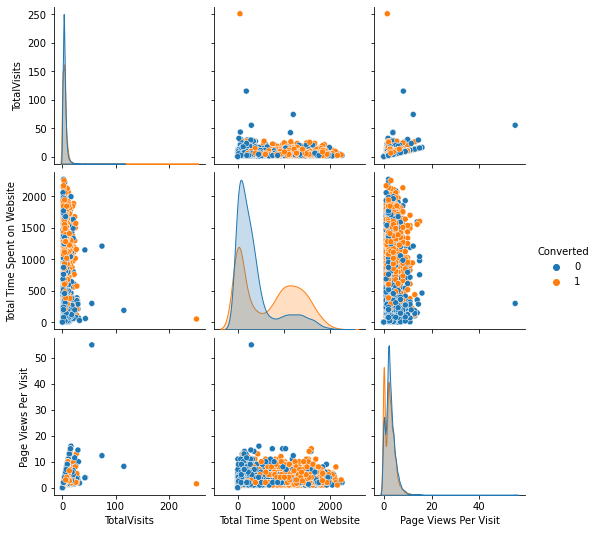

In [ ]:
sns.pairplot(leads,diag_kind='kde',hue='Converted')
plt.show()

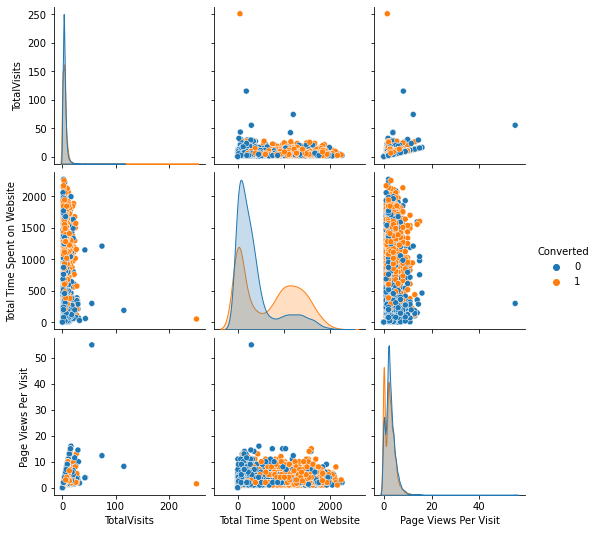

In [ ]:
edu = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(edu,diag_kind='kde',hue='Converted')
plt.show()

In [ ]:
pt = PowerTransformer()
transformededu = pd.DataFrame(pt.fit_transform(edu))
transformededu.columns = edu.columns
transformededu.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  Converted
0        -1.54                        -1.53                 -1.53      -0.96
1         0.69                         0.64                  0.23      -0.96
2        -0.22                         1.26                 -0.02       1.04
3        -0.72                         0.15                 -0.63      -0.96
4        -0.22                         1.20                 -0.63       1.04

In [ ]:
sns.pairplot(transformededu,diag_kind='kde',hue='Converted')
plt.show()

# Dummy variable creation

#### Before proceeding to modeling, here we are checking the categorical attributes and see if we need to create dummy variable for analysis.

In [ ]:
#Check the columns which are of type 'object'
temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
#Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

#Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [ ]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [ ]:
#Drop the variables for which the dummy variables have been created
leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [ ]:
#Check how dataset looks now.
leads.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0         0.00                            0                  0.00   
1          0         5.00                          674                  2.50   
2          1         2.00                         1532                  2.00   
3          0         1.00                          305                  1.00   
4          1         2.00                         1428                  1.00   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_Olark Chat  \
0                   0                      0                       1   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   1                      0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   Do Not Email_Yes  Last Activity_Converted to Lead  \
0                 0                                0   
1                 0                                0   
2                 0                                0   
3                 0                                0   
4                 0                                1   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2         

In [ ]:
list(leads.columns)

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Lead Source_Direct Traffic',
 'Lead Source_Facebook',
 'Lead Source_Google',
 'Lead Source_Live Chat',
 'Lead Source_Olark Chat',
 'Lead Source_Organic Search',
 'Lead Source_Pay per Click Ads',
 'Lead Source_Press_Release',
 'Lead Source_Reference',
 'Lead Source_Referral Sites',
 'Lead Source_Social Media',
 'Lead Source_WeLearn',
 'Lead Source_Welingak Website',
 'Lead Source_bing',
 'Lead Source_testone',
 'Do Not Email_Yes',
 'Last Activity_Converted to Lead',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Marked Spam',
 'Last Activity_Email Opened',
 'Last Activity_Email Received',
 'Last Activity_Form Submitted on Website',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Page Visited on Website',
 'L

# Checking for Outliers

In [ ]:
#Checking for outliers in the continuous variables
num_Leads_data = leads[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']]

In [ ]:
#Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_Leads_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

TotalVisits  Page Views Per Visit  Total Time Spent on Website
count      6373.00               6373.00                      6373.00
mean          3.62                  2.48                       535.22
std           5.05                  2.17                       565.37
min           0.00                  0.00                         0.00
25%           1.00                  1.00                        34.00
50%           3.00                  2.00                       287.00
75%           5.00                  3.50                      1022.00
90%           8.00                  5.00                      1428.80
95%          10.00                  6.00                      1592.40
99%          18.00                  9.00                      1849.28
max         251.00                 55.00                      2272.00

***From above distribution, we can see that there no outliers in our data. And the numbers are gradually increasing.***

# Data Modeling - Test-Train Split

In [ ]:
#Put all the feature variables in X
X = leads.drop(['Converted'], 1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0         0.00                            0                  0.00   
1         5.00                          674                  2.50   
2         2.00                         1532                  2.00   
3         1.00                          305                  1.00   
4         2.00                         1428                  1.00   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_Olark Chat  \
0                   0                      0                       1   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   1                      0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   Do Not Email_Yes  Last Activity_Converted to Lead  \
0                 0                                0   
1                 0                                0   
2                 0                                0   
3                 0                                0   
4                 0                                1   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3       

In [ ]:
#Put the target variable in y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

# Scaling

In [ ]:
#Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

***Here we are splitting the data, there are few attributes like 'total visits', 'total time spend on website'  and 'page view per visit' which have high values and need to be scaled for better analysis.***

In [ ]:
#Scale the three numeric features present in the dataset
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
#X_train.head()

***Checking correlations. Since the number of variables are quite high, it's better that we look at the table instead of plotting a heatmap.***

In [ ]:
#Let's see the correlation matrix 
leads.corr()
X_train.head(15)

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8003         0.02                         0.03                  0.12   
218          0.02                         0.08                  0.25   
4171         0.02                         0.03                  0.38   
4037         0.00                         0.00                  0.00   
3660         0.00                         0.00                  0.00   
207          0.02                         0.16                  0.31   
2044         0.01                         0.16                  0.12   
6411         0.02                         0.57                  0.08   
6498         0.01                         0.24                  0.12   
2085         0.00                         0.00                  0.00   
6260         0.00                         0.00                  0.00   
19           0.01                         0.04                  0.19   
7288         0.00                         0.00                  0.00   
7994         0.01                         0.19                  0.12   
9217         0.00                         0.00                  0.00   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
8003                                    1                          0   
218                                     1                          0   
4171                                    1                          0   
4037                                    0                          0   
3660                                    0                          1   
207                                     0                          0   
2044                                    0                          0   
6411                                    0                          0   
6498                                    1                          0   
2085                                    0                          1   
6260                                    0                          0   
19                                      0                          0   
7288                                    0                          0   
7994                                    1                          0   
9217                                    0                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
8003                        0                           1   
218                         0                           1   
4171                        0                           1   
4037                        0                           0   
3660                        0                           0   
207                         0                           0   
2044                        0                           0   
6411                        0                           0   
6498                        0                           1   
2085                        0                           0   
6260                        0                           0   
19                          0                           0   
7288                        0                           0   
7994                        0                           0   
9217                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
8003                     0                   0                      0   
218                      0                   0                      0   
4171                     0                   0                      0   
4037                     0                   0                      0   
3660                     0                   0                      0   
207                      0                   0                      0   
2044                     0                   1                      0   
6411                     0                   1                      0   
6498                     0                   0                    

# Model Building

In [ ]:
#Import 'LogisticRegression' and create a LogisticRegression object
logreg = LogisticRegression()

In [ ]:
#Import RFE and select 15 variables
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
#Let's take a look at which features have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [ ]:
#Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [ ]:
#Select only the columns selected by RFE
X_train = X_train[col]

In [ ]:
#Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Tue, 07 Dec 2021   Deviance:                       4145.5
Time:                        12:33:31   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

***There are quite a few variable which have a p-value greater than 0.05 (> 5%). We will need to take care of them. But first, let's also look at the VIFs.***

In [ ]:
#Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                           Lead Origin_Lead Add Form 84.19
4                               Lead Source_Reference 65.18
5                        Lead Source_Welingak Website 20.03
11         What is your current occupation_Unemployed  3.65
7              Last Activity_Had a Phone Conversation  2.44
13     Last Notable Activity_Had a Phone Conversation  2.43
1                         Total Time Spent on Website  2.38
0                                         TotalVisits  1.62
8                              Last Activity_SMS Sent  1.59
12  What is your current occupation_Working Profes...  1.56
3                              Lead Source_Olark Chat  1.44
6                                    Do Not Email_Yes  1.09
10            What is your current occupation_Student  1.09
9           What is your current occupation_Housewife  1.01
14                  Last Notable Activity_Unreachable  1.01

***VIF is good except for 3 of the attributes. Hence lets drop attribute 'Lead Source_Reference' as it has 2nd highest VIF and higher P value than 'Lead Origin_Lead Add Form'.***

In [ ]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [ ]:
#Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Tue, 07 Dec 2021   Deviance:                       4146.5
Time:                        12:33:32   Pearson chi2:                 4.82e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [ ]:
#Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
10         What is your current occupation_Unemployed 3.65
6              Last Activity_Had a Phone Conversation 2.44
12     Last Notable Activity_Had a Phone Conversation 2.43
1                         Total Time Spent on Website 2.38
2                           Lead Origin_Lead Add Form 1.71
0                                         TotalVisits 1.62
7                              Last Activity_SMS Sent 1.59
11  What is your current occupation_Working Profes... 1.56
3                              Lead Source_Olark Chat 1.44
4                        Lead Source_Welingak Website 1.33
5                                    Do Not Email_Yes 1.09
9             What is your current occupation_Student 1.09
8           What is your current occupation_Housewife 1.01
13                  Last Notable Activity_Unreachable 1.01

***All the VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with Last Notable Activity_Had a Phone Conversation.***

In [ ]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [ ]:
#Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Tue, 07 Dec 2021   Deviance:                       4152.2
Time:                        12:33:32   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

***P-value of 'Drop What is your current occupation_Housewife.' is very high so lets drop that variable.***

In [ ]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [ ]:
#Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Tue, 07 Dec 2021   Deviance:                       4156.7
Time:                        12:33:32   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

***Drop What is your current occupation_Working Professional.***

In [ ]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [ ]:
#Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Tue, 07 Dec 2021   Deviance:                       4158.1
Time:                        12:33:33   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

***All the p-values are now in the required range.*** 

***Let's also check the VIFs again in case we had missed something.***

In [ ]:
#Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
9   What is your current occupation_Unemployed 2.82
1                  Total Time Spent on Website 2.00
0                                  TotalVisits 1.54
7                       Last Activity_SMS Sent 1.51
2                    Lead Origin_Lead Add Form 1.45
3                       Lead Source_Olark Chat 1.33
4                 Lead Source_Welingak Website 1.30
5                             Do Not Email_Yes 1.08
8      What is your current occupation_Student 1.06
6       Last Activity_Had a Phone Conversation 1.01
10           Last Notable Activity_Unreachable 1.01

***Now as both Pvalue and VIF both values are in the required range for analysis let move to Model evaluation.***

# Model Evaluation

In [ ]:
#Use 'predict' to predict the probabilities on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003   0.30
218    0.14
4171   0.13
4037   0.29
3660   0.95
207    0.19
2044   0.18
6411   0.95
6498   0.08
2085   0.98
dtype: float64

In [ ]:
#Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [ ]:
#Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0             0.30
1          0             0.14
2          1             0.13
3          1             0.29
4          1             0.95

In [ ]:
#Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0             0.30          0
1          0             0.14          0
2          1             0.13          0
3          1             0.29          0
4          1             0.95          1

In [ ]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

In [ ]:
#Create confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1929  383]
 [ 560 1589]]


In [ ]:
#Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7886124187401928


In [ ]:
#Let's evaluate the other metrics as well
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Calculate the sensitivity
TP/(TP+FN)

0.739413680781759

In [ ]:
#Calculate the specificity
TN/(TN+FP)

0.8343425605536332

In [ ]:
#Calculate false postive rate - predicting conversion when customer does not have converted
FP/ (TN+FP)

0.1656574394463668

In [ ]:
#Positive predictive value 
TP / (TP+FP)

0.8057809330628803

In [ ]:
#Negative predictive value
TN / (TN+ FN)

0.7750100441944556

### Finding the Optimal Cutoff
#### Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [ ]:
#ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

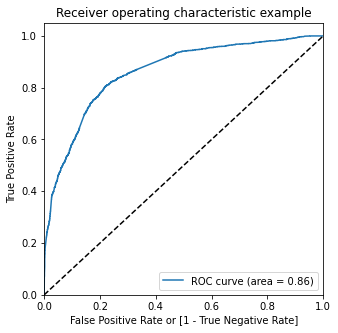

In [ ]:
#Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

***The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.***

In [ ]:
#Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0             0.30          0    1    1    1    1    0    0    0   
1          0             0.14          0    1    1    0    0    0    0    0   
2          1             0.13          0    1    1    0    0    0    0    0   
3          1             0.29          0    1    1    1    0    0    0    0   
4          1             0.95          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

In [ ]:
#Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.48   1.00   0.00
0.10  0.10      0.53   0.99   0.09
0.20  0.20      0.70   0.94   0.47
0.30  0.30      0.77   0.87   0.68
0.40  0.40      0.79   0.81   0.77
0.50  0.50      0.79   0.74   0.83
0.60  0.60      0.76   0.62   0.88
0.70  0.70      0.74   0.54   0.91
0.80  0.80      0.71   0.45   0.95
0.90  0.90      0.64   0.28   0.98


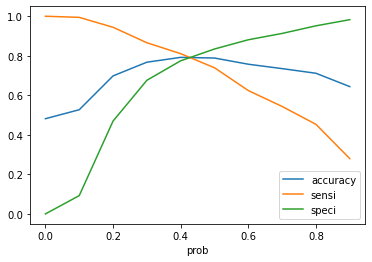

In [ ]:
#Let's plot it as well
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

***As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.***

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0             0.30          0    1    1    1    1    0    0    0   
1          0             0.14          0    1    1    0    0    0    0    0   
2          1             0.13          0    1    1    0    0    0    0    0   
3          1             0.29          0    1    1    1    0    0    0    0   
4          1             0.95          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [ ]:
#Let's check the accuracy now
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7908540685944856

In [ ]:
#Let's create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1823,  489],
       [ 444, 1705]], dtype=int64)

In [ ]:
#Let's evaluate the other metrics as well
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
#Calculate Sensitivity
TP/(TP+FN)

0.793392275476966

In [ ]:
#Calculate Specificity
TN/(TN+FP)

0.7884948096885813

In [ ]:
#Calculate false postive rate - predicting conversion when customer does not have converted
FP/ (TN+FP)

0.21150519031141868

In [ ]:
#Positive predictive value 
TP / (TP+FP)

0.7771194165907019

In [ ]:
#Negative predictive value
TN / (TN+ FN)

0.80414644905161

# Making Predictions on the Test Set

In [ ]:
#Scale the test set as well using just 'transform'
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [ ]:
#Select the columns in X_train for X_test as well
X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4771         0.00                         0.00                          1   
6122         0.03                         0.03                          0   
9202         0.02                         0.42                          0   
6570         0.01                         0.38                          0   
2668         0.03                         0.40                          0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4771                       0                      1   
6122                       0                      0   
9202                       0                      0   
6570                       0                      0   
2668                       0                      0   

      Lead Source_Welingak Website  Do Not Email_Yes  \
4771                             0                 0   
6122                             0                 0   
9202                             0                 0   
6570                             0                 1   
2668                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
4771                                       0                       1   
6122                                       0                       0   
9202                                       0                       1   
6570                                       0                       1   
2668                                       0                       1   

      What is your current occupation_Housewife  \
4771                                          0   
6122                                          0   
9202                                          0   
6570                                          0   
2668                                          0   

      What is your current occupation_Student  \
4771                                        0   
6122                                        0   
9202                                        0   
6570                                        0   
2668                                        0   

      What is your current occupation_Unemployed  \
4771                                           0   
6122                                           1   
9202                                           1   
6570                                           1   
2668                                           1   

      What is your current occupation_Working Professional  \
4771                                                  1      
6122                                                  0      
9202                                                  0      
6570                                                  0      
2668                                                  0      

      Last Notable Activity_Had a Phone Conversation  \
4771                                               0   
6122                                               0   
9202                                               0   
6570                                               0   
2668                                               0   

      Last Notable Activity_Unreachable  
4771                                  0  
6122                                  0  
9202                                  0  
6570                                  0  
2668                                  0

In [ ]:
#Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])

In [ ]:
#Check X_test_sm
X_test_sm

const  TotalVisits  Total Time Spent on Website  \
4771   1.00         0.00                         0.00   
6122   1.00         0.03                         0.03   
9202   1.00         0.02                         0.42   
6570   1.00         0.01                         0.38   
2668   1.00         0.03                         0.40   
...     ...          ...                          ...   
5828   1.00         0.01                         0.03   
6583   1.00         0.01                         0.15   
5531   1.00         0.06                         0.70   
3056   1.00         0.01                         0.42   
4088   1.00         0.02                         0.53   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
4771                          1                       0   
6122                          0                       0   
9202                          0                       0   
6570                          0                       0   
2668                          0                       0   
...                         ...                     ...   
5828                          0                       0   
6583                          0                       0   
5531                          0                       0   
3056                          0                       0   
4088                          0                       0   

      Lead Source_Reference  Lead Source_Welingak Website  Do Not Email_Yes  \
4771                      1                             0                 0   
6122                      0                             0                 0   
9202                      0                             0                 0   
6570                      0                             0                 1   
2668                      0                             0                 0   
...                     ...                           ...               ...   
5828                      0                             0                 0   
6583                      0                             0                 0   
5531                      0                             0                 0   
3056                      0                             0                 1   
4088                      0                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
4771                                       0                       1   
6122                                       0                       0   
9202                                       0                       1   
6570                                       0                       1   
2668                                       0                       1   
...                                      ...                     ...   
5828                                       0                       1   
6583                                       0                       1   
5531                                       0                       0   
3056                                       0                       1   
4088                                       0                       0   

      What is your current occupation_Housewife  \
4771                                          0   
6122                                          0   
9202                                          0   
6570                                          0   
2668                                          0   
...                                         ...   
5828                                          0   
6583                                          0   
5531                                          0   
3056                                          0   
4088                                          0   

      What is your current occupation_Student  \
4771                                        0   
6122                                        0   
9202                                  

In [ ]:
#Drop the required columns from X_test as well
X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [ ]:
#Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))

In [ ]:
y_test_pred[:10]

4771   1.00
6122   0.13
9202   0.70
6570   0.30
2668   0.72
4233   0.79
3368   0.70
9091   0.46
5972   0.28
3631   0.79
dtype: float64

In [ ]:
#Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
#Let's see the head
y_pred_1.head()

0
4771 1.00
6122 0.13
9202 0.70
6570 0.30
2668 0.72

In [ ]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
#Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
#Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
#Check 'y_pred_final'
y_pred_final.head()

Converted    0
0          1 1.00
1          0 0.13
2          0 0.70
3          1 0.30
4          1 0.72

In [ ]:
#Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [ ]:
#Let's see the head of y_pred_final
y_pred_final.head()

Converted  Conversion_Prob
0          1             1.00
1          0             0.13
2          0             0.70
3          1             0.30
4          1             0.72

In [ ]:
#Make predictions on the test set using 0.42 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [ ]:
#Check y_pred_final
y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1             1.00                1
1          0             0.13                0
2          0             0.70                1
3          1             0.30                0
4          1             0.72                1

In [ ]:
#Let's check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7845188284518828

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[786, 210],
       [202, 714]], dtype=int64)

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
#Calculate sensitivity
TP / float(TP+FN)

0.7794759825327511

In [ ]:
#Calculate specificity
TN / float(TN+FP)

0.7891566265060241

## Precision-Recall View

#### Here we are building the training model using the precision-recall view

In [ ]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1929,  383],
       [ 560, 1589]], dtype=int64)

Precision
TP / TP + FP

In [ ]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8057809330628803

Recall
TP / TP + FN

In [ ]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.739413680781759

# Precision and recall tradeoff

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

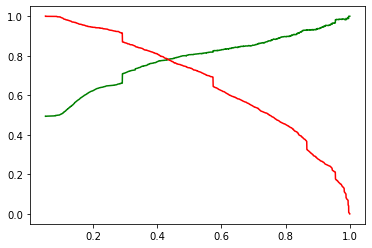

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From the above plot we can notice optimal cutoff is approximately 0.44

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0             0.30          0    1    1    1    1    0    0    0   
1          0             0.14          0    1    1    0    0    0    0    0   
2          1             0.13          0    1    1    0    0    0    0    0   
3          1             0.29          0    1    1    1    0    0    0    0   
4          1             0.95          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [ ]:
#Let's check the accuracy now
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7895090786819099

In [ ]:
#Let's create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1852,  460],
       [ 479, 1670]], dtype=int64)

In [ ]:
#Let's evaluate the other metrics as well
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
#Calculate Precision
TP/(TP+FP)

0.784037558685446

In [ ]:
#Calculate Recall
TP/(TP+FN)

0.7771056305258259

# Making Predictions on the Test Set

In [ ]:
#Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))

In [ ]:
y_test_pred[:10]

4771   1.00
6122   0.13
9202   0.70
6570   0.30
2668   0.72
4233   0.79
3368   0.70
9091   0.46
5972   0.28
3631   0.79
dtype: float64

In [ ]:
#Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
#Let's see the head
y_pred_1.head()

0
4771 1.00
6122 0.13
9202 0.70
6570 0.30
2668 0.72

In [ ]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
#Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
#Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
#Check 'y_pred_final'
y_pred_final.head()

Converted    0
0          1 1.00
1          0 0.13
2          0 0.70
3          1 0.30
4          1 0.72

In [ ]:
#Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [ ]:
#Let's see the head of y_pred_final
y_pred_final.head()

Converted  Conversion_Prob
0          1             1.00
1          0             0.13
2          0             0.70
3          1             0.30
4          1             0.72

In [ ]:
#Make predictions on the test set using 0.44 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [ ]:
#Check y_pred_final
y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1             1.00                1
1          0             0.13                0
2          0             0.70                1
3          1             0.30                0
4          1             0.72                1

In [ ]:
#Let's check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7866108786610879

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[801, 195],
       [213, 703]], dtype=int64)

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
#Calculate Sensitivity
TP/(TP+FN)

0.767467248908297

In [ ]:
#Calculate Specificity
TN/(TN+FP)

0.8042168674698795

In [ ]:
#Calculate Recall
TP/(TP+FN)

0.767467248908297

In [ ]:
#Calculate Precision
TP/(TP+FP)

0.7828507795100222

# Summary & Recommendation

* From the problem statement provided, there are a lot of leads generated in the initial stage (top of funnel) but only a few of them are converted to paying customers (from the bottom of funnel). 
* In the middle stage, you need to focus on the potential leads like educating the leads about the product, constantly communicating etcso that more leads can get converted as students. 
* From the analysis we have identified that 'TotalVisits' , 'Total Time Spent on Website' , 'Page Views Per Visit' which contribute most towards the probability of a lead getting converted  you can focus on these to drill down to the best prospects from the leads you have generated.
* The leads received from above need to be informed about new courses, services, job offers and future higher studies based on the interest shared. 
* Keep track each lead carefully so that you can tailor the information you send to them. Based on the interest of leads you have received filter out the leads who are interested in job offering and provide them with relevant job offer. 
* A proper plan to chart the needs of each lead will go a long way to capture the leads as prospects. 
* Acknowledge converted leads and discuss with them regarding referral benefits. Publish the benefits of referrals.
* Make further inquiries and appointments with the leads to determine their intention and mentality to join online courses. 
* Most important do not spam the leads with irrelevant information.